# Nouvelles hospitalisation Covid-19 en France

Récupération du CSV :

In [1]:
from urllib.request import urlopen
with urlopen("https://www.data.gouv.fr/fr/datasets/r/d3a98a30-893f-47f7-96c5-2f4bcaaa0d71") as f:
    dataset = f.read().decode("utf-8")

Extraction des données :

In [2]:
from datetime import date
nouveaux_patients = dict()
for line in dataset.split("\r\n")[1:]:
    words = line.split(",")
    if words[9] != "":
        day = date(*map(int, words[0].split("-")))
        nouveaux_patients[day] = int(words[9])

Moyenne glissante sur 7 jours (de -3j à +3j inclus) :

In [3]:
from datetime import timedelta
avg = dict()
for day in sorted(nouveaux_patients):
    start = day - timedelta(days=3)
    s = c = 0
    for dday in (start + timedelta(days=n) for n in range(7)):
        if dday in nouveaux_patients:
            s += nouveaux_patients[dday]
            c += 1
    avg[day] = s / c

Affichage :

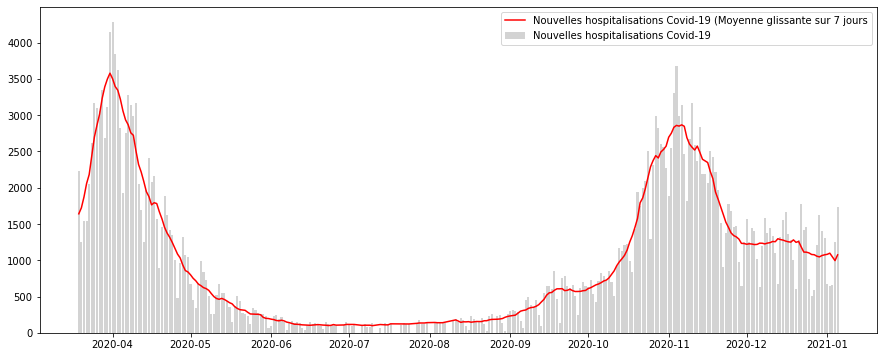

In [4]:
from matplotlib import pyplot as plt, dates as mdates, rcParams
rcParams["figure.figsize"] = (15,6)
plt.bar(*zip(*nouveaux_patients.items()), label="Nouvelles hospitalisations Covid-19", color="lightgrey")
plt.plot(*zip(*avg.items()), label="Nouvelles hospitalisations Covid-19 (Moyenne glissante sur 7 jours", color="red")
#plt.yscale("log")
plt.legend()
plt.show()